1-install tensorflow 1.14
and install split folder

In [1]:
pip install split_folders


In [2]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 85kB/s 
     |████████████████████████████████| 3.2MB 44.2MB/s 
     |████████████████████████████████| 491kB 46.9MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


2- mount google drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3- import requirement library

In [6]:
import pandas as pd
import numpy as np
import wave
from numpy import argmax
import scipy
from scipy import signal
from scipy.fft import fftshift
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import tensorflow.keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import split_folders



/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [7]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
AudioData = 'class1 class2 class3'.split()
for g in AudioData:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/gdrive/My Drive/Farand/Audio/NewAudio/Audio/{g}'):
        songname = f'/content/gdrive/My Drive/Farand/Audio/NewAudio/Audio/{g}/{filename}'
        sr, y = wavfile.read(songname)
        plt.specgram(y, NFFT=512,Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
        #sr, y = wavfile.read(WAVE_OUTPUT_FILENAME)

        #f, t, Sxx = signal.spectrogram(y, sr)
        #plt.pcolormesh(t, f, Sxx)
        

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

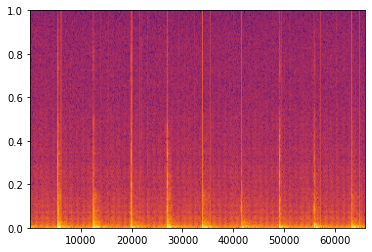

In [0]:
sr,y=wavfile.read('/content/gdrive/My Drive/Farand/Audio/NewAudio/Audio/class1/class1_0.wav')
plt.specgram(y, NFFT=512,Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');


In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiz
test_datagen = ImageDataGenerator(rescale=1./255)

split_folders.ratio('./img_data/', output="./data",ratio=(.8, .2)) # default values




Copying files: 0 files [00:00, ? files/s]
Copying files: 120 files [00:00, 1193.32 files/s]
Copying files: 224 files [00:00, 1141.45 files/s]
Copying files: 326 files [00:00, 1030.84 files/s]


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
        shear_range=0.2, #to apply some random tranfromations
        zoom_range=0.2, #to apply zoom
        horizontal_flip=True) # image will be flipper horiz
test_datagen = ImageDataGenerator(rescale=1./255)

split_folders.ratio('/content/gdrive/My Drive/Farand/Audio/Image/', output="./data",ratio=(.8, .2)) # default values



In [10]:
training_set = train_datagen.flow_from_directory(
        './data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = test_datagen.flow_from_directory(
        './data/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )


Found 260 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [18]:
model = Sequential()
input_shape=(64, 64, 3)
#1st hidden layer
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#2nd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#3rd hidden layer
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
#Flatten
model.add(Flatten())
model.add(Dropout(rate=0.5))
#Add fully connected layer.
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
#Output layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d_6 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
activation_10 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_7 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_11 (Activation)   (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)         

In [0]:
epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [0]:
model.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=30,
        validation_data=test_set,
        validation_steps=200)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 1.1052 - acc: 0.2853 - val_loss: 1.0712 - val_acc: 0.5604
Epoch 2/30
100/100 [==============================] - 101s 1s/step - loss: 1.0897 - acc: 0.3306 - val_loss: 1.0492 - val_acc: 0.3027
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 1.0759 - acc: 0.3600 - val_loss: 1.0316 - val_acc: 0.4848
Epoch 4/30
100/100 [==============================] - 101s 1s/step - loss: 1.0496 - acc: 0.4176 - val_loss: 0.9821 - val_acc: 0.4848
Epoch 5/30
100/100 [==============================] - 104s 1s/step - loss: 0.9926 - acc: 0.4965 - val_loss: 0.8762 - val_acc: 0.7271
Epoch 6/30
100/100 [==============================] - 103s 1s/step - loss: 0.9210 - acc: 0.5493 - val_loss: 0.8946 - val_acc: 0.6518
Epoch 7/30
 16/100 [===>..........................] - ETA: 31s - loss: 0.9508 - acc: 0.4934

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('modelnew.h5')
model_file = drive.CreateFile({'title' : 'modelnew.h5'})                       
model_file.SetContentFile('modelnew.h5')                       
drive.CreateFile({'id': model_file.get('id')})
model_file.Upload()